# Regresión multivariante

Importamos los datos en bolsa de IBM entre 2015 y 2017 a través de la web de Google

Utilizamos este tipo de datos sin ningún interés financiero, simplemente para que sean reales y abundantes.

In [2]:
import pandas as pd
import pandas.io.data as web   
import datetime
import warnings

warnings.filterwarnings('ignore')
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2017,1,1)
IBM = web.DataReader("IBM", "google", start, end)
IBM.head(), type(IBM)

(              Open    High     Low   Close   Volume
 Date                                               
 2015-01-02  161.31  163.31  161.00  162.06  5525466
 2015-01-05  161.27  161.27  159.19  159.51  4880389
 2015-01-06  159.67  159.96  155.17  156.07  6146712
 2015-01-07  157.20  157.20  154.03  155.05  4701839
 2015-01-08  156.24  159.04  155.55  158.42  4241113,
 pandas.core.frame.DataFrame)

Nos quedamos con la variable Close, valor con el que cierra el día.

Observamos su valor en función del día en un plot.

Populating the interactive namespace from numpy and matplotlib


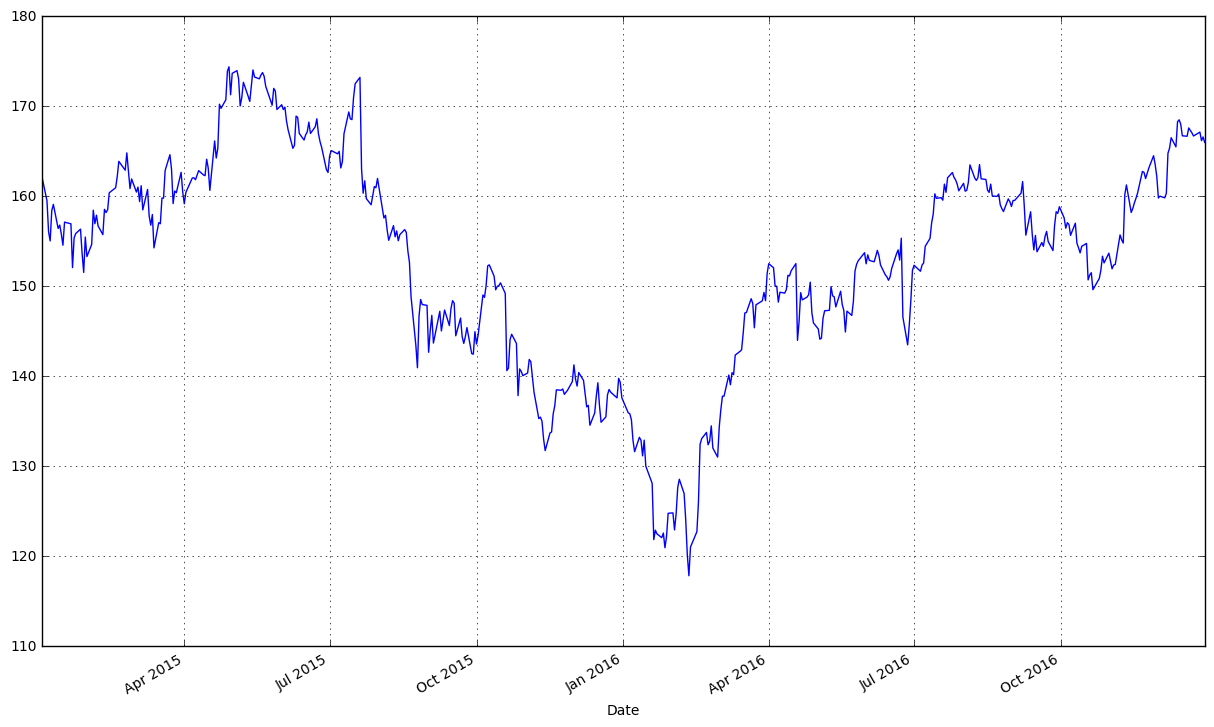

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15,9)

IBM["Close"].plot(grid = True)

Vamos a simplificar el eje x como valores entre (0,1] de manera creciente proporcionalmente. 

Datos de entrenamiento
[[  1.98412698e-03   1.62060000e+02]
 [  3.96825397e-03   1.59510000e+02]
 [  5.95238095e-03   1.56070000e+02]
 ..., 
 [  9.96031746e-01   1.66190000e+02]
 [  9.98015873e-01   1.66600000e+02]
 [  1.00000000e+00   1.65990000e+02]]


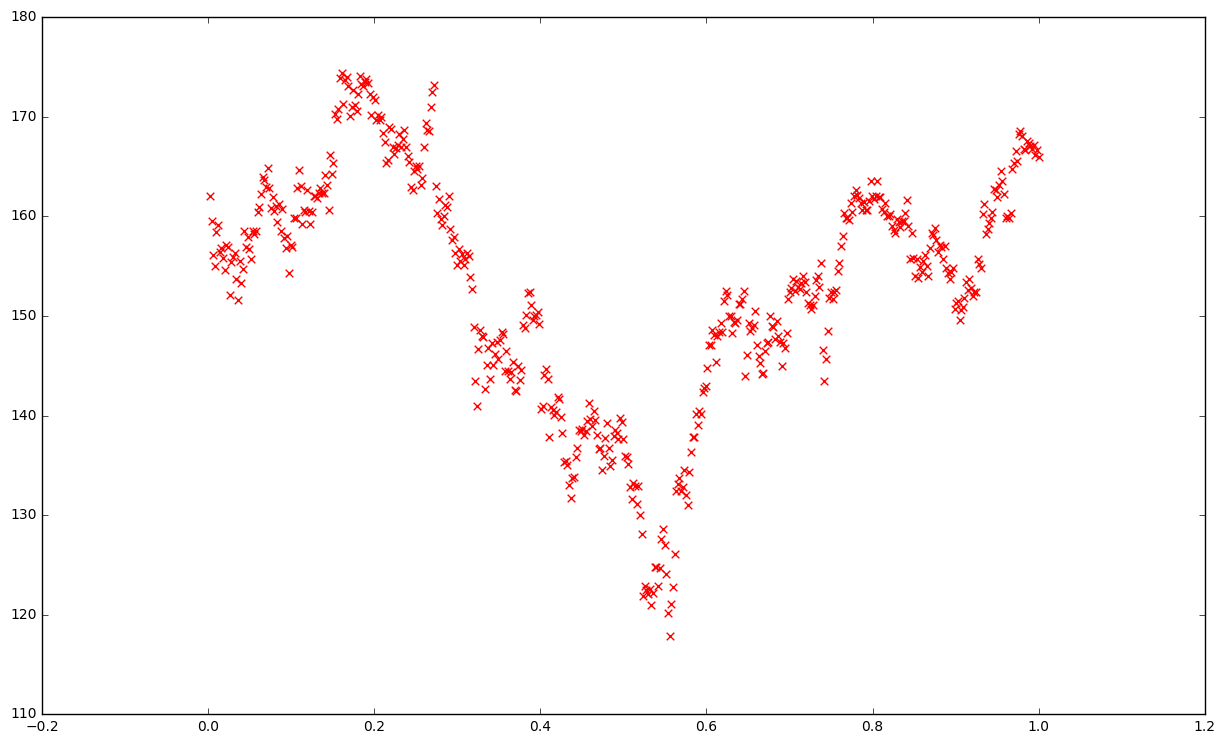

In [4]:
import numpy as np
X = np.array(range(1,(np.shape(IBM)[0])+1)).reshape(-1,1)/504
y = np.c_[IBM["Close"]]

print('Datos de entrenamiento')
print(np.c_[X, y])
plt.scatter(X, y, s=30, c='r', marker='x')


Utilizando scikit-learn calculamos su recta de regresión.

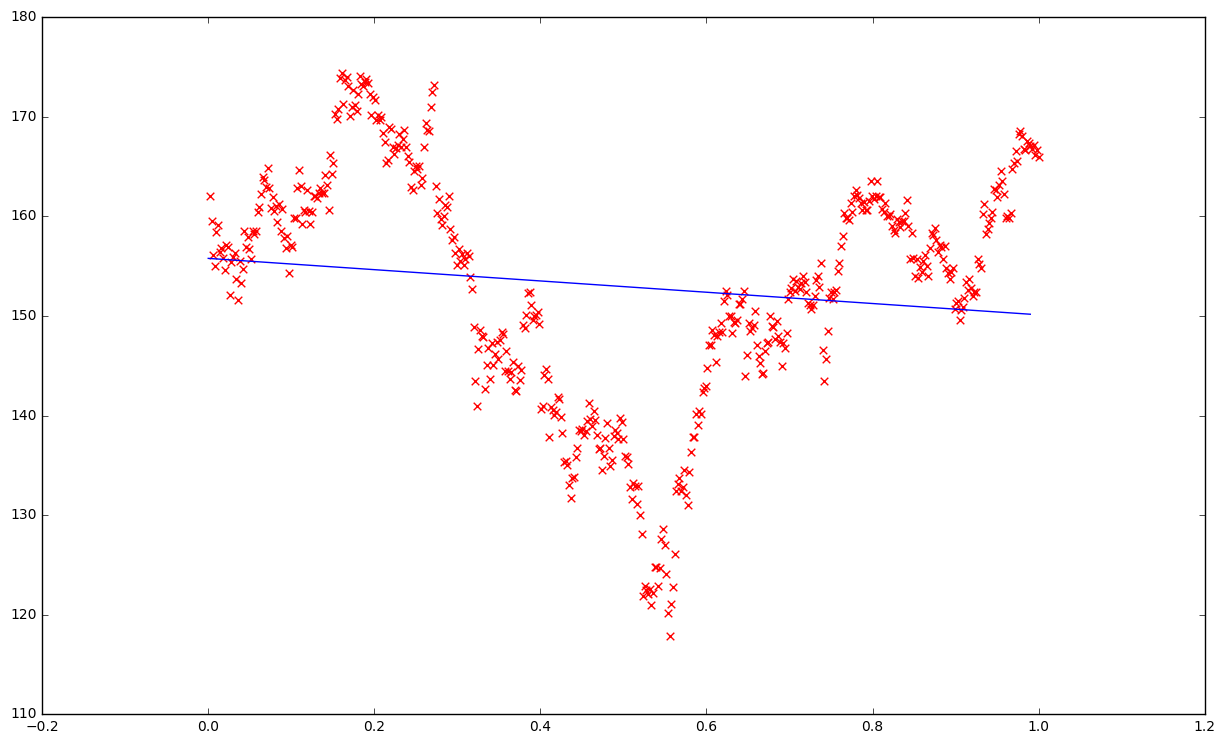

Observamos cláramente que con una variable 
no podemos aproximar correctamente los datos


In [5]:
from sklearn.linear_model import LinearRegression
xx = np.arange(0,1, 0.01)
regr = LinearRegression(fit_intercept= True)
regr.fit(X, y)
plt.scatter(X, y, s=30, c='r', marker='x')

plt.plot(xx, regr.intercept_[0]+regr.coef_[0]*xx)
plt.show()
print('Observamos cláramente que con una variable ')
print('no podemos aproximar correctamente los datos')

## Feature Engineering

Nuestra hipótesis es $h_{\theta}(x)=\theta_{0}+\theta_{1}x_{1}$ siendo $x_{1}$ la única variable, Como nuestro input no es suficiente para aproximar nuestros datos.

Vamos a implementar una función que nos genere nuevos datos de entrenamiento. <p>
Esta función tomará como argumento $x_{1}$ y el número de nuevas características que queremos crear k o grado máximo al que llegará nuestra variable. <p>
Nuestro nuevo input estará formado por $k$ variables con expresión
$x_{k}=x_{1}^{k}$

In [6]:
def mapFeature(X, degree=1):
    
    import scipy.special

    X = np.reshape(X,newshape= (np.size(X),1))
    output = X[:, 0:1]
    for i in range(1, degree + 1):            
        f = (X** (i))
        output = np.append(output, f, axis = 1)
    return output

Vamos a generar nuevas características, en concreto serán 9 quedando.
$$x_{1}=x_{1} $$
$$x_{2}=x_{1}^{2}$$
$$ \vdots $$
$$x_{10} = x_{1}^{10}$$

In [7]:
X_map = mapFeature(X,degree=10)
print('Dimensión nuevo input', np.shape(X_map))

Dimensión nuevo input (504, 11)


Nuestra nueva hipótesis es
$$h_{\theta}(x)=\theta_{0}+x_{1}\theta_{1}+x_{2}\theta_{2}+...+x_{10}\theta_{10}= \theta_{0}+x_{1}\theta_{1}+x_{1}^{2}\theta_{2}+...+x_{1}^{10}\theta_{10}=\sum_{j=0}^{10}x_{1}^{j}\theta_{j}$$

Calculamos la nueva regresión, siendo ahora un polinomio de grado 10.<p>
Al depender sólo de la variable inicial $x_{1}$, es posible realizar un plot.

A este tipo de regresión se la conoce como regresión polinómica


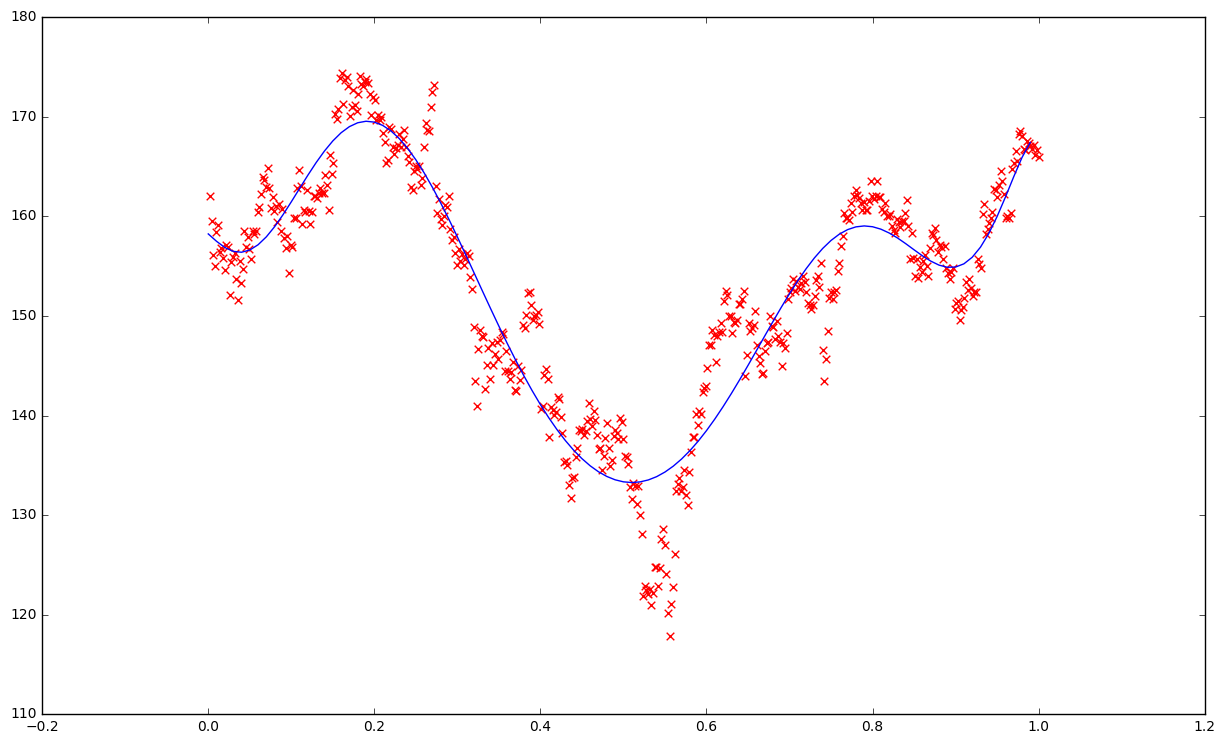

In [8]:
print('A este tipo de regresión se la conoce como regresión polinómica')
xx = np.arange(0,1,0.01).T
regr = LinearRegression(fit_intercept= True)
regr.fit(X_map, y)
plt.scatter(X, y, s=30, c='r', marker='x')
plt.plot(xx, regr.intercept_[0]+mapFeature(xx.reshape(-1,1),degree=10).dot(regr.coef_[0]))
plt.show()